___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

Column names are not suitable to use. Let us rename them.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income_k','Spending Score (1-100)':'Spending_Score_100'},inplace=True)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_k     200 non-null    int64 
 4   Spending_Score_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual_Income_k,Spending_Score_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [8]:
df.nunique()

CustomerID            200
Gender                  2
Age                    51
Annual_Income_k        64
Spending_Score_100     84
dtype: int64

Customer ID uniquely represents each customers. Therefore, it is not necessary for the analysis.

In [9]:
df.drop(columns= "CustomerID", inplace=True)

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





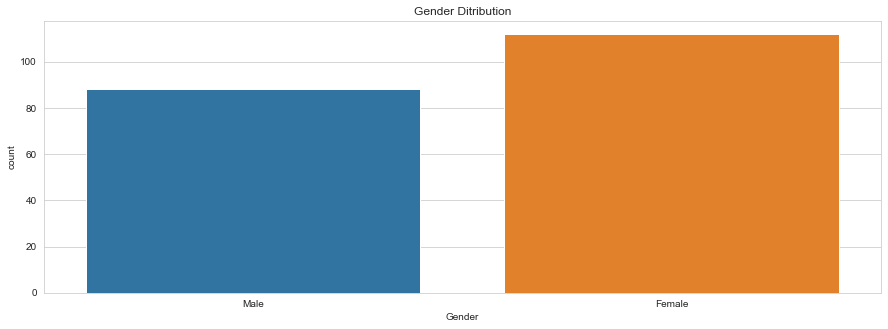

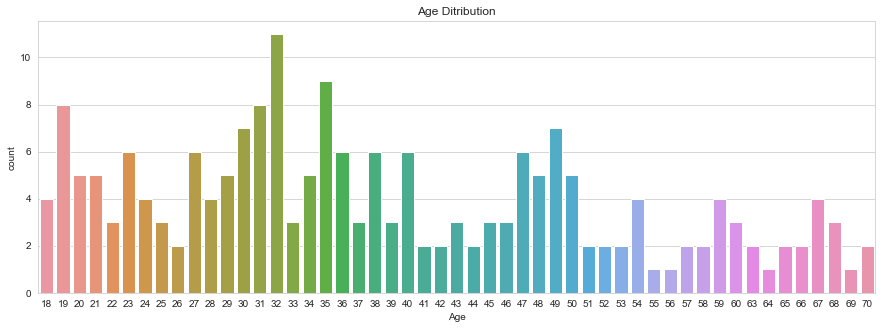

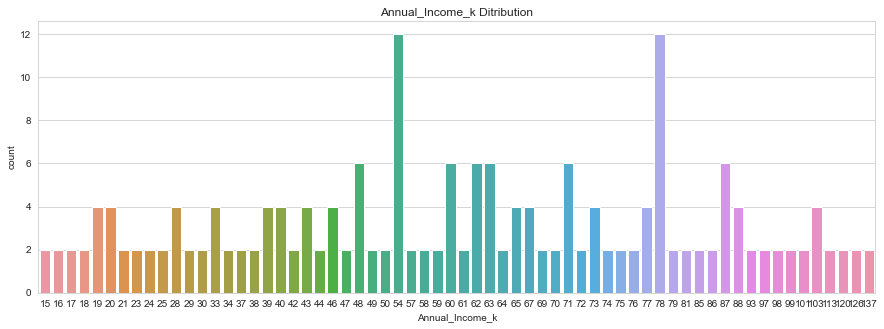

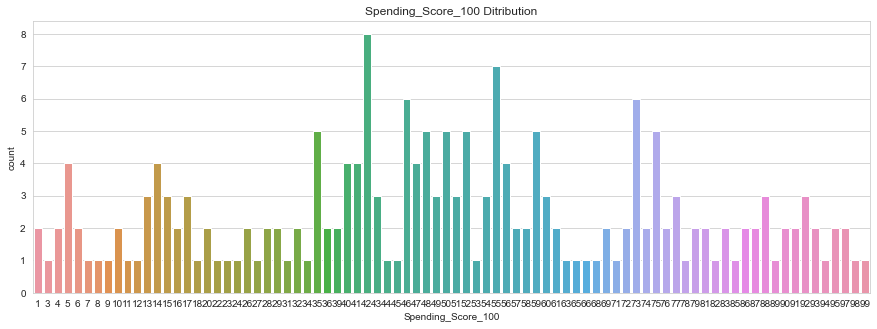

In [10]:
for col in df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(x =col, data = df)
    title=col+" "+'Ditribution'
    plt.title(title)
    plt.xlabel(col)
    plt.show()
    

Text(0, 0.5, 'Count')

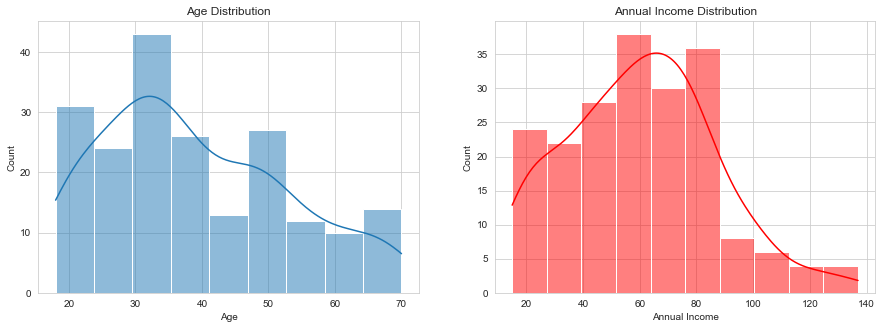

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income_k', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

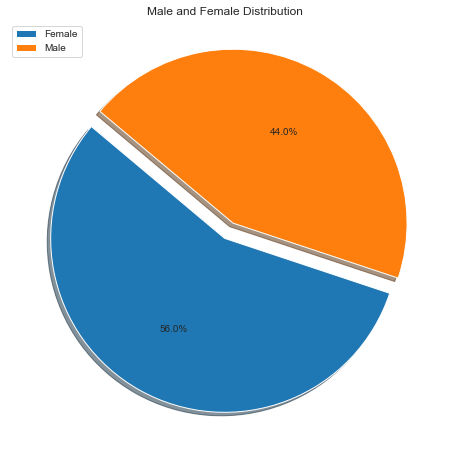

In [13]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

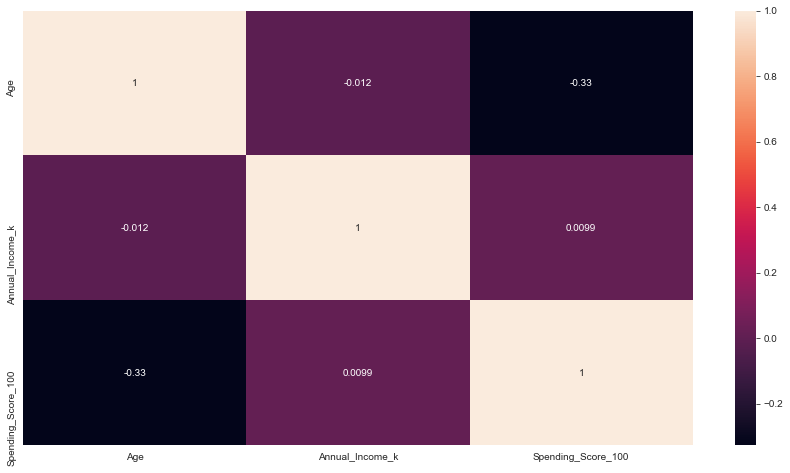

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

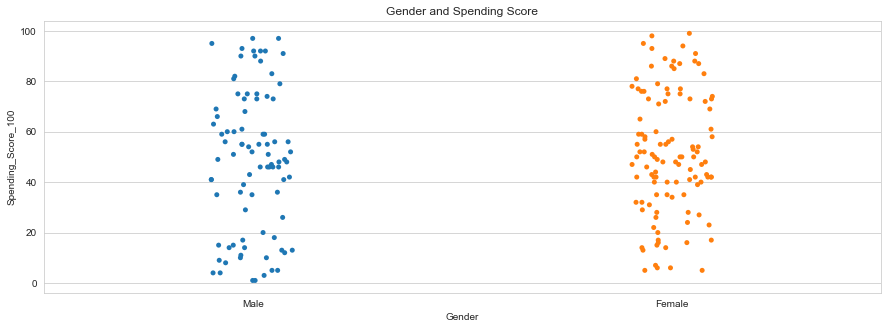

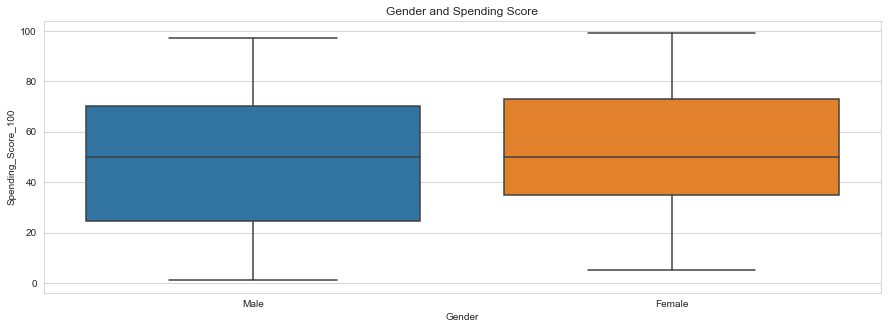

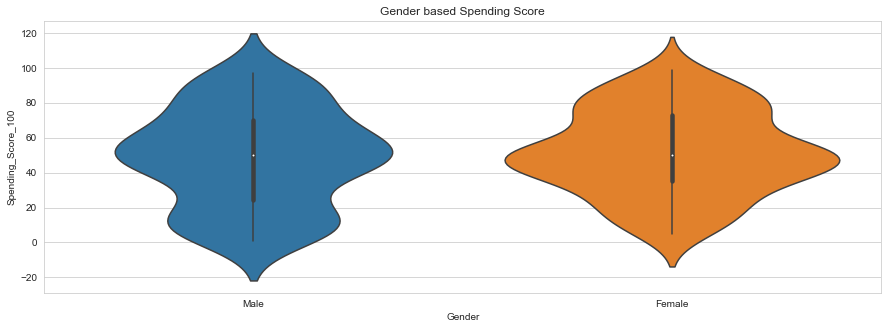

In [19]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score_100', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score_100', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score_100', data=df)
plt.title('Gender based Spending Score')
plt.show()

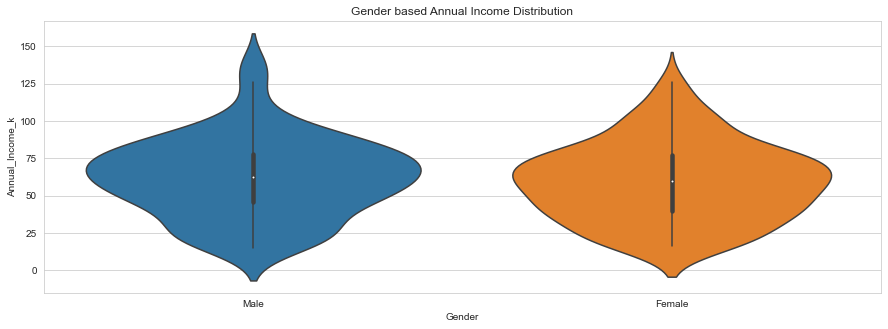

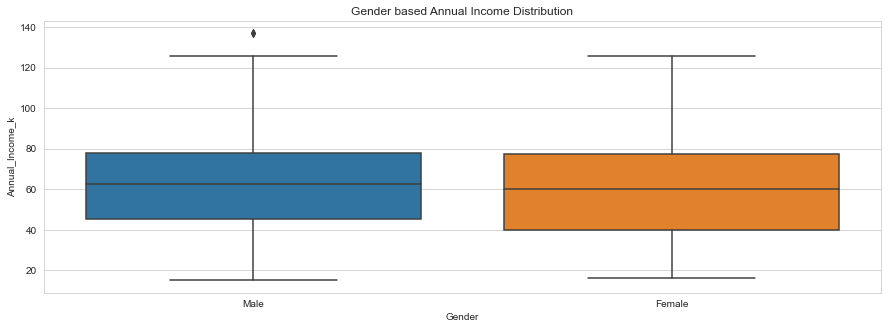

In [18]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income_k', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income_k', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

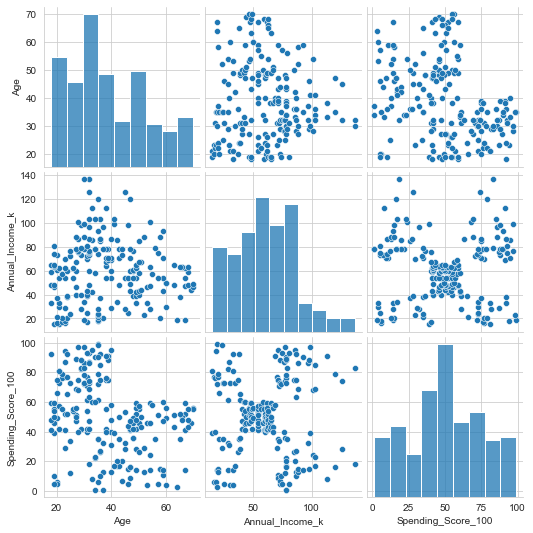

In [20]:
sns.pairplot(df)

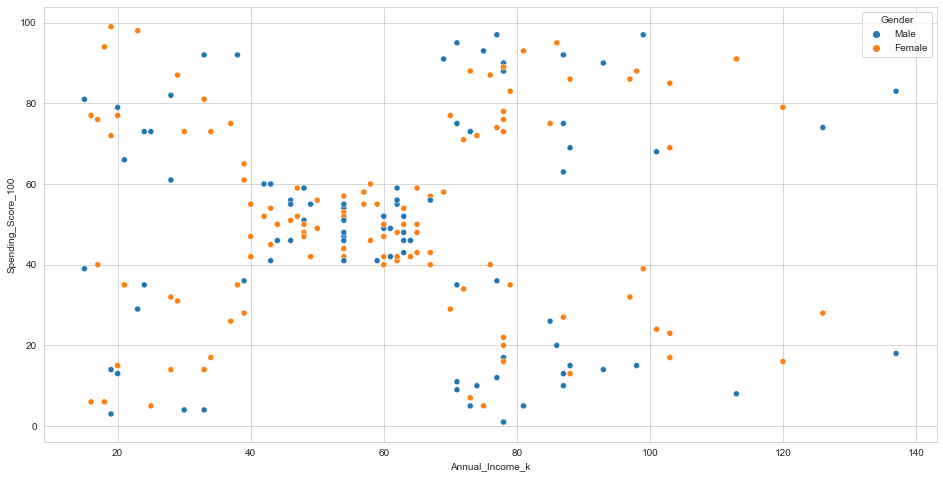

In [22]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income_k', y='Spending_Score_100', data=df, hue = "Gender")
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [23]:
df1 = df.drop(columns="Gender")

In [24]:
from pyclustertend import hopkins

In [25]:
hopkins(df1, df1.shape[0])

0.30847790679916937

In [26]:
x1 = df[['Age','Spending_Score_100']]
x1

,Age,Spending_Score_100
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [27]:
hopkins(x1, x1.shape[0])

0.32392633407083454

#### *ii. Determine optimal number of clusters*

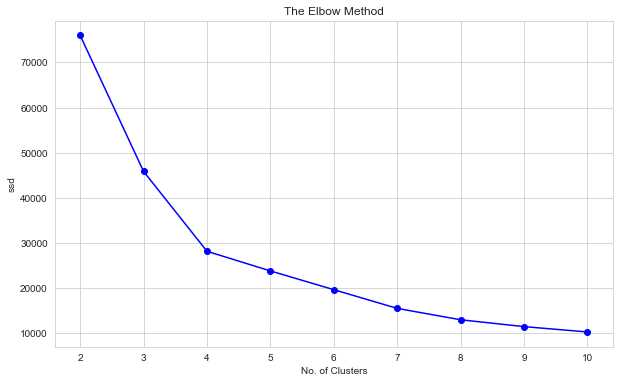

In [28]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=101)
    kmeans.fit(x1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [29]:
ssd

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23818.84825158133,
 19664.73951714552,
 15523.684014328755,
 13002.466488382794,
 11486.150087792641,
 10302.90821609952]

In [30]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4346.735315
4    -4154.108734
5    -4141.055503
6    -2521.217526
7    -1516.316401
8    -1183.241872
dtype: float64

In [31]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4346.735315
5,4154.108734
6,4141.055503
7,2521.217526
8,1516.316401
9,1183.241872


<AxesSubplot:>

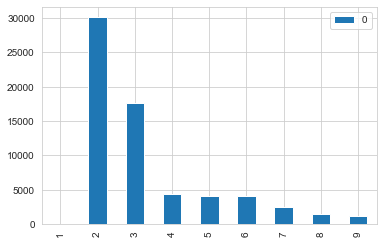

In [32]:
df_diff.plot(kind='bar')

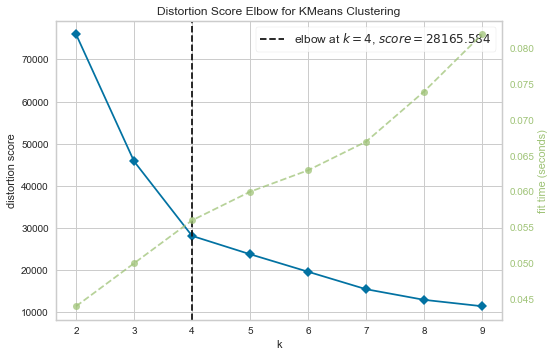

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=101)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof()

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x1)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

<p style="text-align: center;"><img src="https://i.stack.imgur.com/wzNuZ.png" class="img-fluid" alt="CLRSWY"></p>

The centroid of blue cluster is 1 unit away from red point and similarly the centroid of green cluster is about 1.075. Therefore, the nearest centroid to red point belongs to blue cluster. When the red point assigned to blue cluster, then silihoutte score is When red point is assigned to blue cluster, then average distance to two green points is aabout 1.075 and average distance to blue members is about 1.41. When red point is wrongly assigned to blue cluster, then difference between intra-cluster distance and inter_cluster distance in -0.31. Finally, the maximum of these two distance is 1.41 and the silihoutte score becomes -0.24. __The negativity indicates that red point is wrongly assigned to blue cluster.__ But, if it is assigned to green cluster then silihoutte score would be 0.24. There, red point should have been assigned to green cluster. Otherwise the score would be negative.

#### *iii. Apply K Means*

In [37]:
kmeans = KMeans(n_clusters = 4, random_state=101)

In [38]:
kmeans.fit_predict(x1)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [39]:
x1["cluster_Kmeans"] = kmeans.fit_predict(x1)

<ipython-input-39-7fa17fa30c90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["cluster_Kmeans"] = kmeans.fit_predict(x1)


In [40]:
x1

,Age,Spending_Score_100,cluster_Kmeans
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

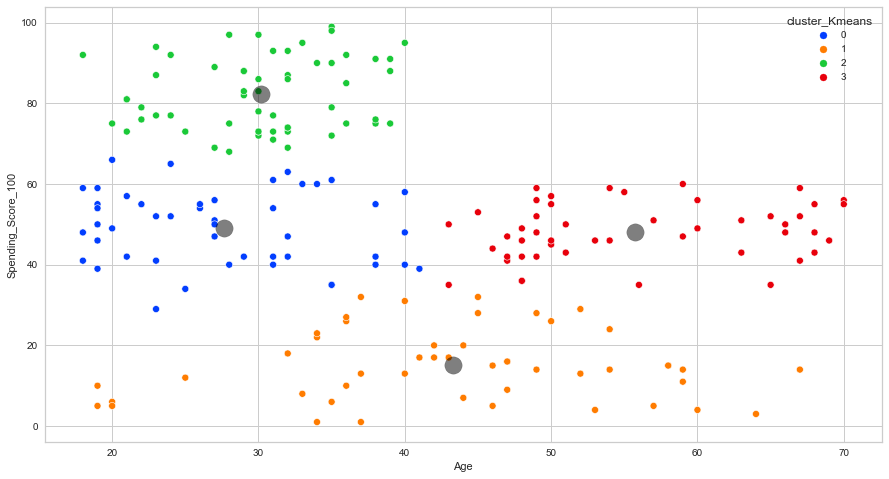

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score_100', hue='cluster_Kmeans', data=x1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [74]:
df1 = df.drop(columns="Gender")

In [ ]:
from pyclustertend import hopkins

In [75]:
hopkins(df1, df1.shape[0])

0.3122418218953727

In [92]:
x2 = df.loc[:,['Annual_Income_k','Spending_Score_100']]
x2

,Annual_Income_k,Spending_Score_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [93]:
hopkins(x2, x2.shape[0])

0.29874036533374987

#### *ii. Determine optimal number of clusters*

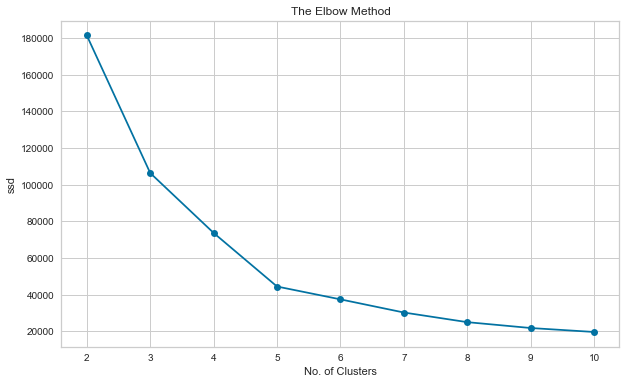

In [94]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=101)
    kmeans.fit(x2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [95]:
ssd

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30273.394312070042,
 25011.920255473768,
 21818.114588452183,
 19657.783608703958]

In [ ]:
pd.Series(ssd).diff()

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

In [ ]:
df_diff.plot(kind='bar')

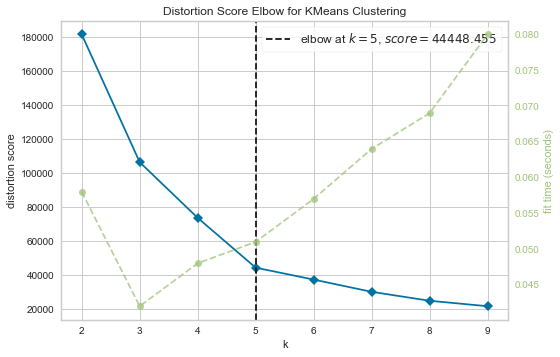

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=101)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof()

In [98]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(x2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5367558067779578
For n_clusters=7, the silhouette score is 0.5270287298101395
For n_clusters=8, the silhouette score is 0.4551839202075395
For n_clusters=9, the silhouette score is 0.457462901394195
For n_clusters=10, the silhouette score is 0.44760979994374317


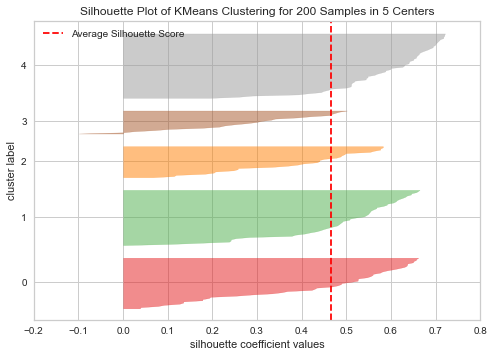

In [99]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x1)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [100]:
kmeans = KMeans(n_clusters = 5, random_state=101)

In [101]:
kmeans.fit_predict(x2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [102]:
x2["cluster_Kmeans"] = kmeans.fit_predict(x2)

In [103]:
x2

,Annual_Income_k,Spending_Score_100,cluster_Kmeans
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

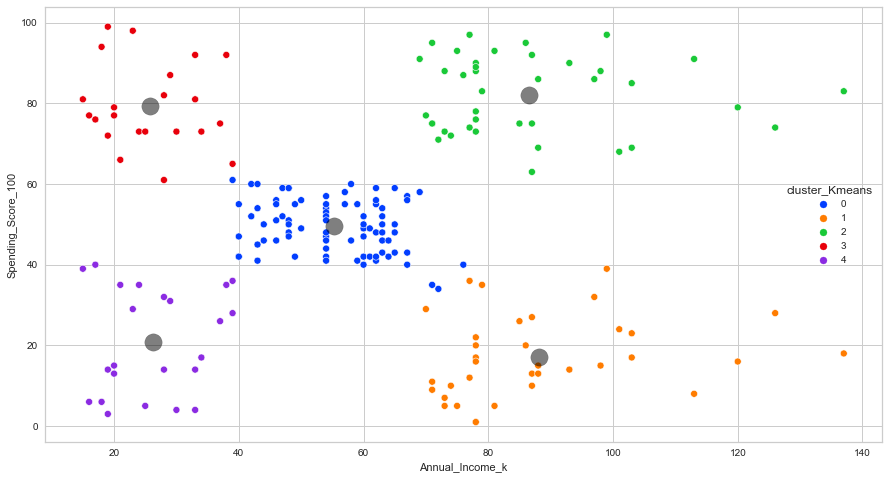

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Annual_Income_k', y='Spending_Score_100', hue='cluster_Kmeans', data=x2, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [63]:
from scipy.cluster.hierarchy import linkage

In [65]:
hc_ward = linkage(y = x1, method = "ward")
hc_complete = linkage(x1, "complete")
hc_average = linkage(x1, "average")
hc_single = linkage(x1, "single")

In [66]:
from scipy.cluster.hierarchy import dendrogram

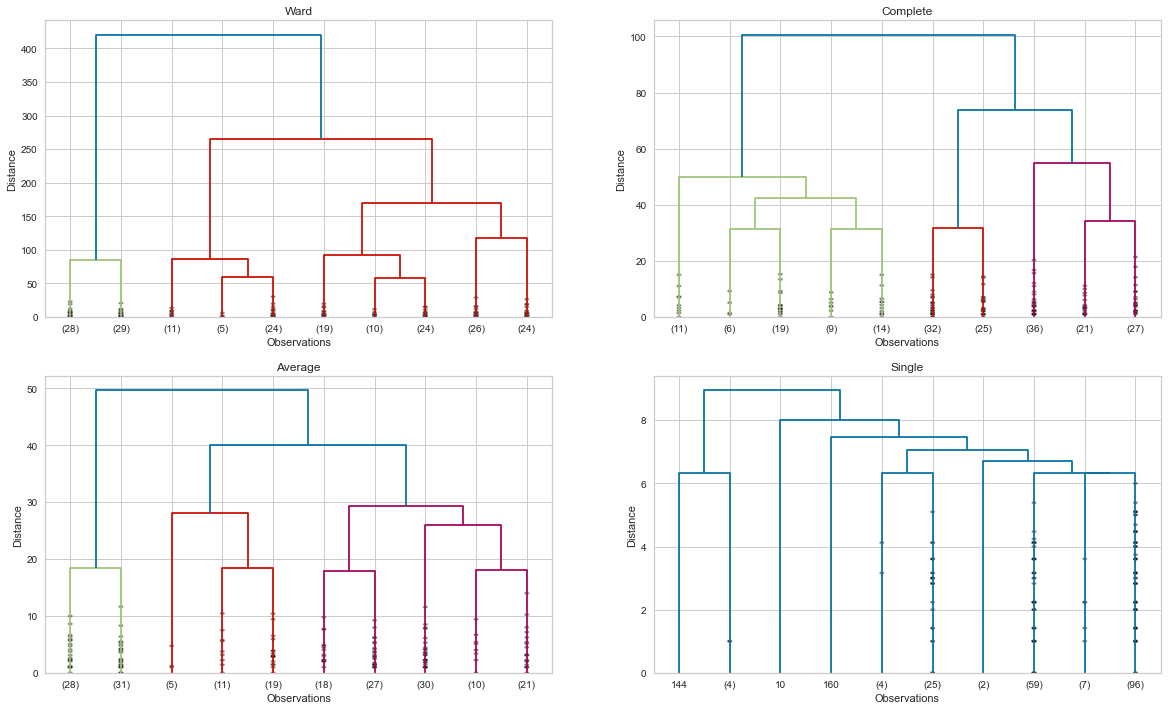

In [67]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

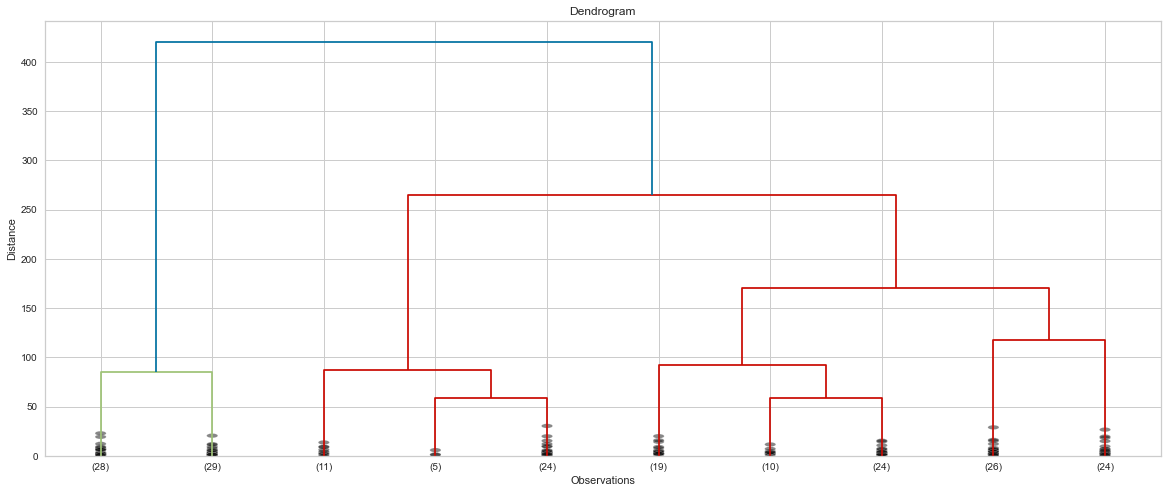

In [68]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [72]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45454592584148096
For n_clusters=3, the silhouette score is 0.4406245222112989
For n_clusters=4, the silhouette score is 0.4608405468661758
For n_clusters=5, the silhouette score is 0.4043739061256346
For n_clusters=6, the silhouette score is 0.4125751937244674
For n_clusters=7, the silhouette score is 0.4158018450743115
For n_clusters=8, the silhouette score is 0.3881443379710403
For n_clusters=9, the silhouette score is 0.39456163701637914
For n_clusters=10, the silhouette score is 0.388362398923104


## Clustering based on Annual Income and Spending Score- x2

In [105]:
hc_ward = linkage(y = x2, method = "ward")
hc_complete = linkage(x2, "complete")
hc_average = linkage(x2, "average")
hc_single = linkage(x2, "single")

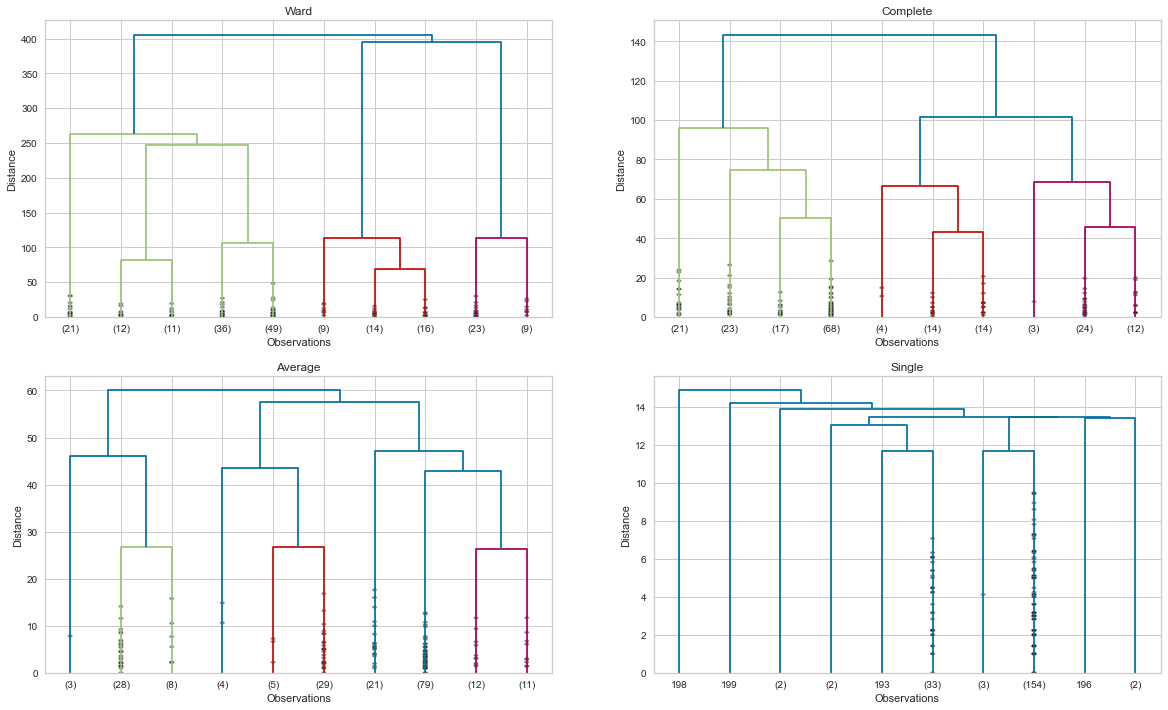

In [106]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

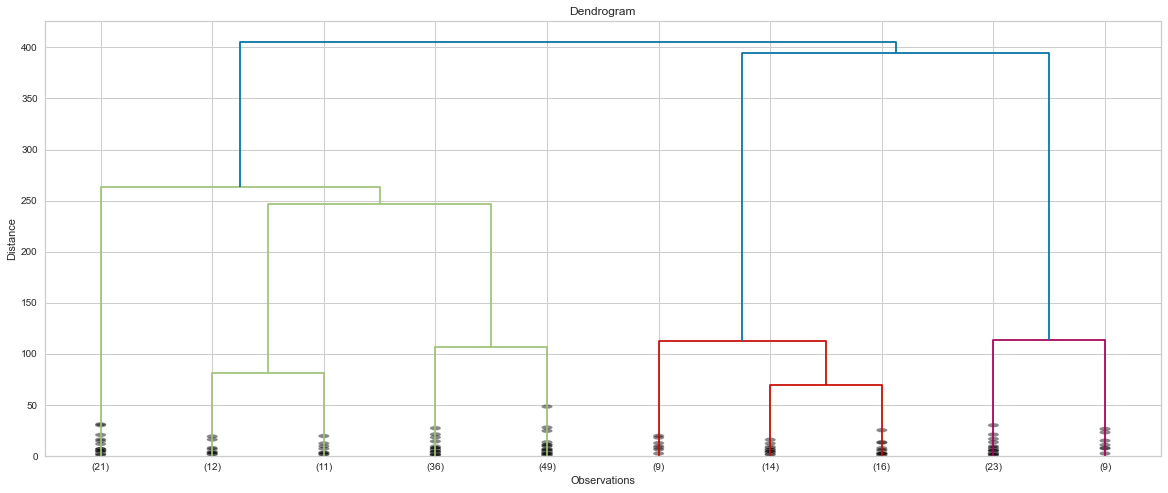

In [107]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [108]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36658258970912255
For n_clusters=3, the silhouette score is 0.4612907084201447
For n_clusters=4, the silhouette score is 0.49150837154412275
For n_clusters=5, the silhouette score is 0.5542164886093149
For n_clusters=6, the silhouette score is 0.5391819652493749
For n_clusters=7, the silhouette score is 0.5210151535996677
For n_clusters=8, the silhouette score is 0.4333916065552157
For n_clusters=9, the silhouette score is 0.439732146230979
For n_clusters=10, the silhouette score is 0.43502277387772664


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [109]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(x1)

In [110]:
x1['cluster_Agg'] = y_agg
x1.head()

,Age,Spending_Score_100,cluster_Kmeans,cluster_Agg
0,19,39,0,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,0,0


#### Annual Income and Spending Score- x2

In [111]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(x2)

In [112]:
x2['cluster_Agg'] = y_agg2
x2.head()

,Annual_Income_k,Spending_Score_100,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

<AxesSubplot:xlabel='Age', ylabel='Spending_Score_100'>

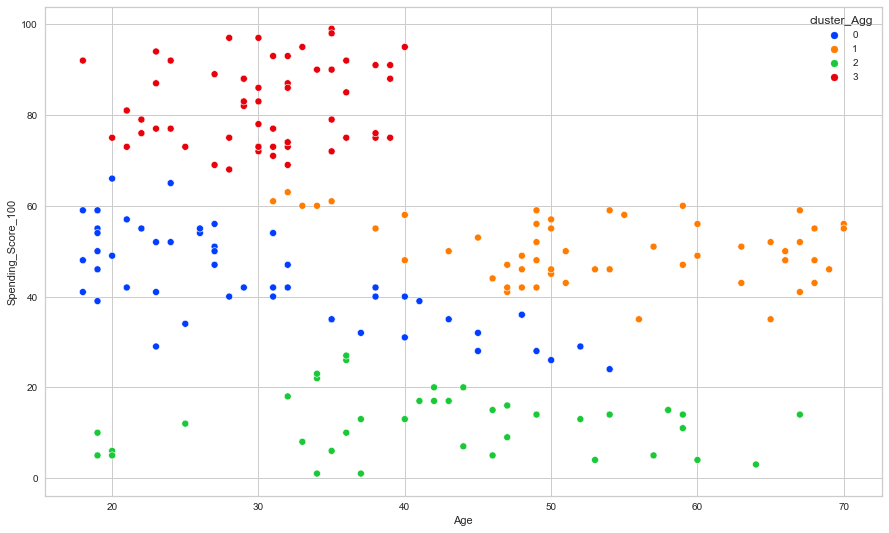

In [114]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score_100', hue='cluster_Agg', data=x1, palette="bright")

Text(0.5, 1.0, 'Agg')

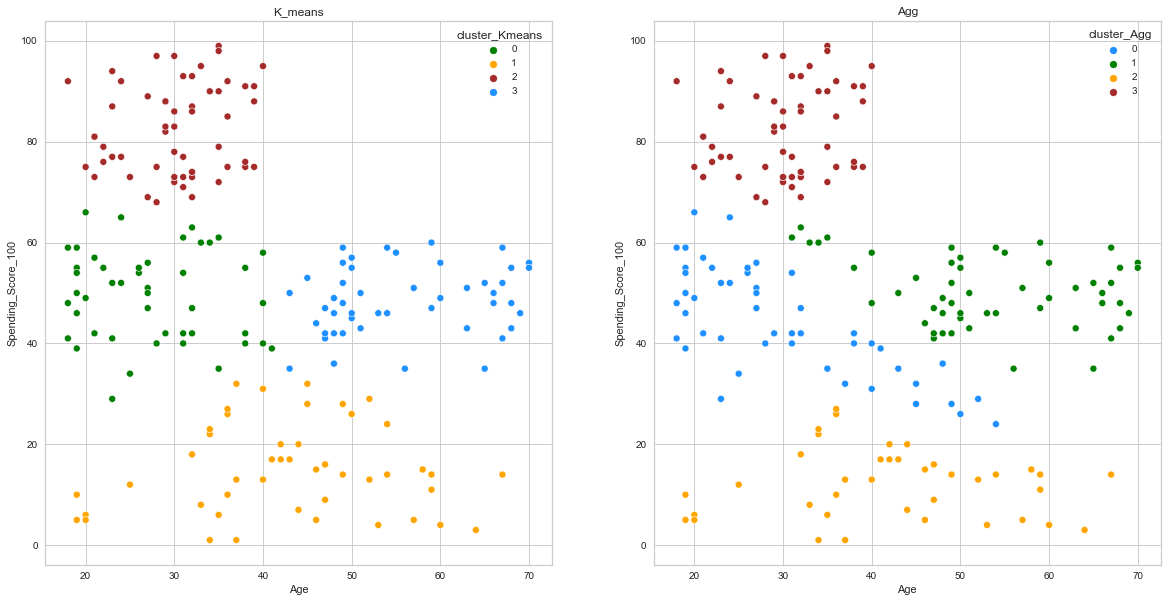

In [116]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score_100', hue='cluster_Kmeans', data=x1, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score_100', hue='cluster_Agg', data=x1, palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score- x2

<AxesSubplot:xlabel='Annual_Income_k', ylabel='Spending_Score_100'>

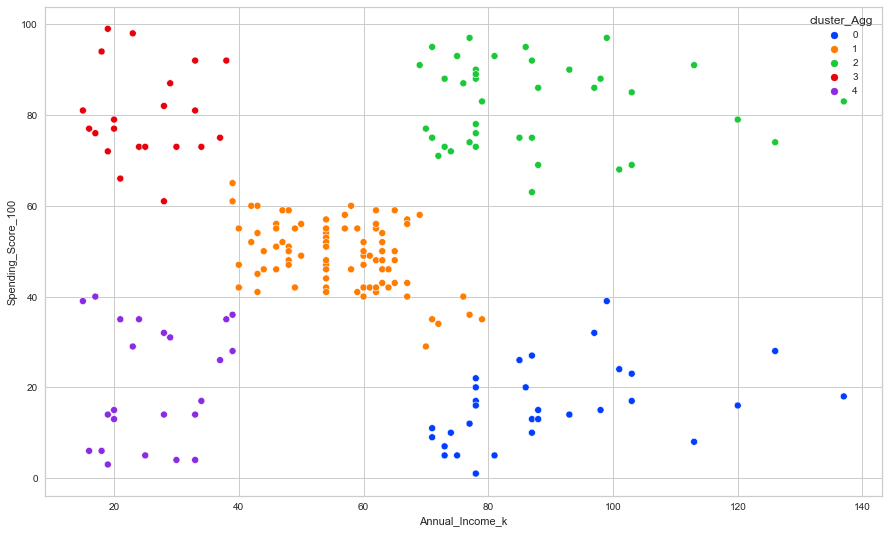

In [117]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income_k', y='Spending_Score_100', hue='cluster_Agg', data=x2 ,palette="bright")

Text(0.5, 1.0, 'Agg')

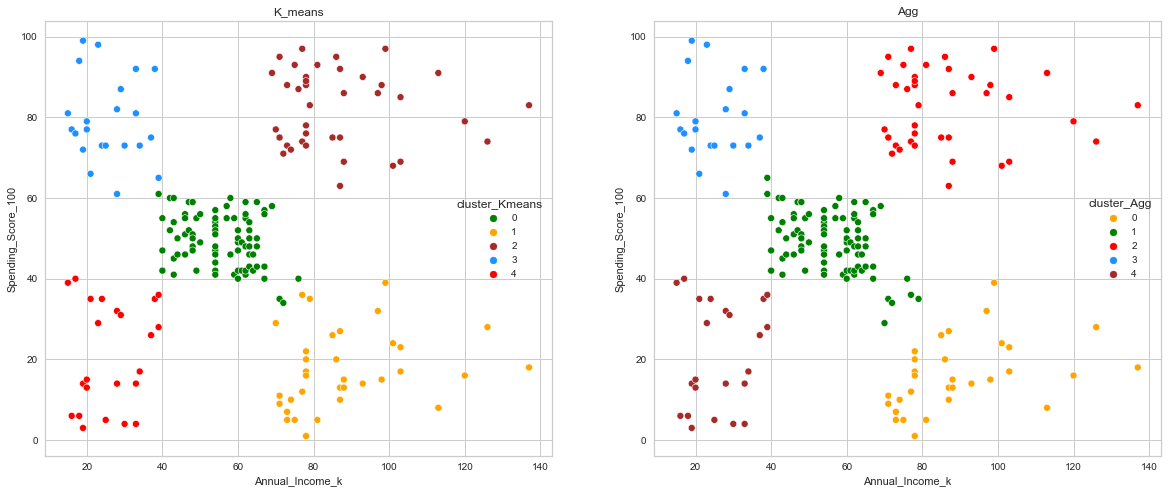

In [119]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income_k', y='Spending_Score_100', hue='cluster_Kmeans', data=x2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income_k', y='Spending_Score_100', hue='cluster_Agg', data=x2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

In [120]:
x1.head()

,Age,Spending_Score_100,cluster_Kmeans,cluster_Agg
0,19,39,0,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,0,0


In [121]:
x1.cluster_Kmeans.value_counts()

2    57
1    48
3    48
0    47
Name: cluster_Kmeans, dtype: int64

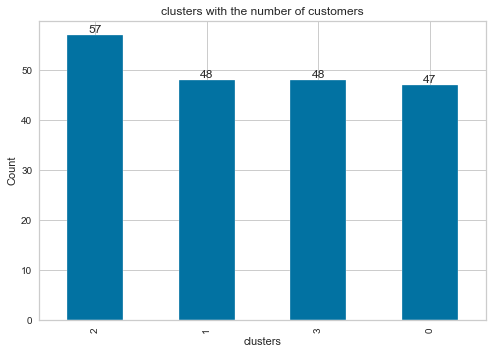

In [122]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [123]:
df.head()

,Gender,Age,Annual_Income_k,Spending_Score_100
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [124]:
df["cluster_Age_Spending_Score"] = x1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income_k,Spending_Score_100,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,0


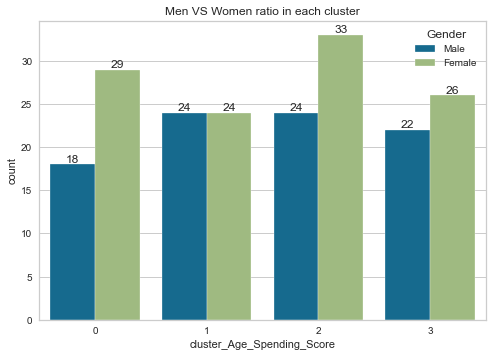

In [125]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [126]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income_k,Spending_Score_100
cluster_Age_Spending_Score,,,
0,27.617021,53.276596,49.148936
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,55.708333,54.770833,48.229167


<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score_100'>

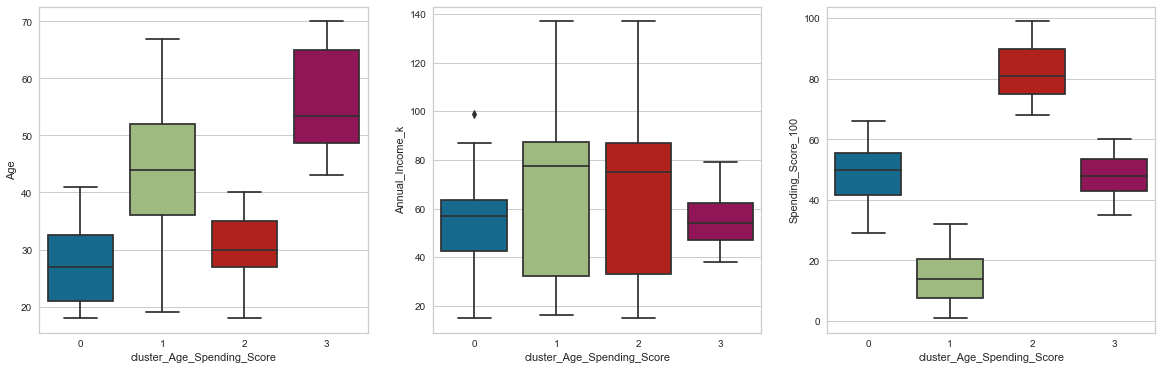

In [127]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income_k", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score_100", x = "cluster_Age_Spending_Score", data = df)

<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score_100'>

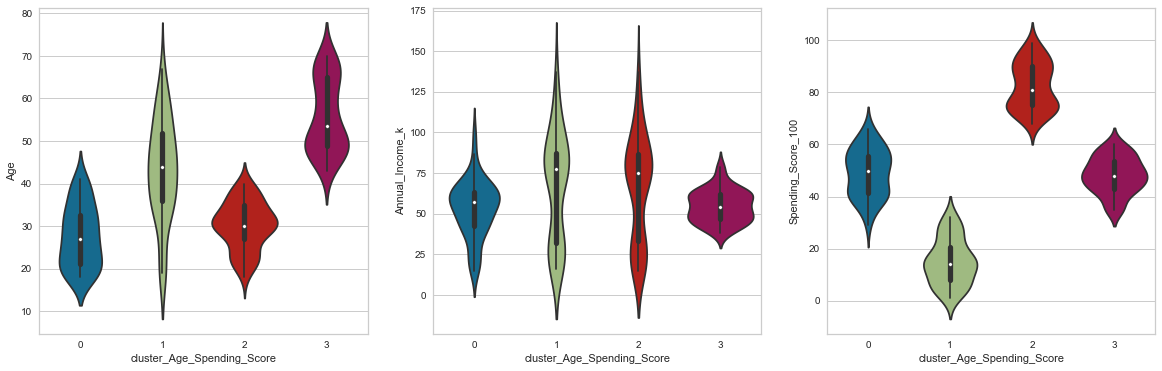

In [128]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income_k", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score_100", x = "cluster_Age_Spending_Score", data = df)

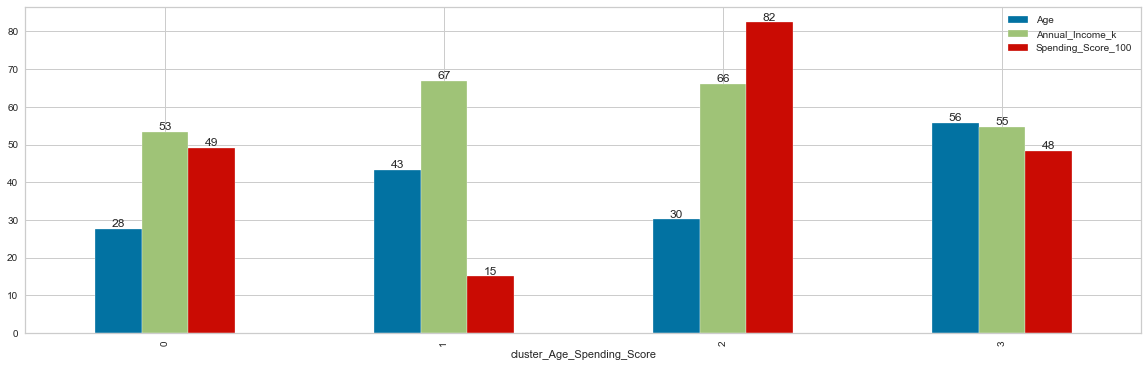

In [129]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0**: The average age is around 28. Annual income is a little bit greater than spending scores on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annual income is greater than spending_scores. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annual income is less than spending_scores. 
This group consists of our loyal customers. Our company obtains the main profit from this group. Very 
special promotions can be made in order not to miss it.    

**cluster 3** : The average age is around 56. Annual income is a little bit greater than spending scores on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [130]:
x2

,Annual_Income_k,Spending_Score_100,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4
...,...,...,...,...
195,120,79,2,2
196,126,28,1,0
197,126,74,2,2
198,137,18,1,0


In [131]:
x2.cluster_Kmeans.value_counts()

0    81
2    39
1    35
4    23
3    22
Name: cluster_Kmeans, dtype: int64

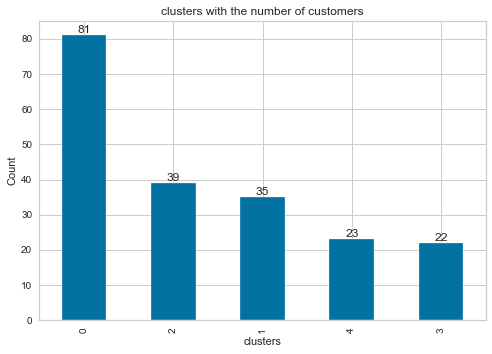

In [132]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [133]:
df.head()

,Gender,Age,Annual_Income_k,Spending_Score_100,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,0


In [134]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [135]:
df["cluster_Annual_Income_Spending_Score"] = x2.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income_k,Spending_Score_100,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


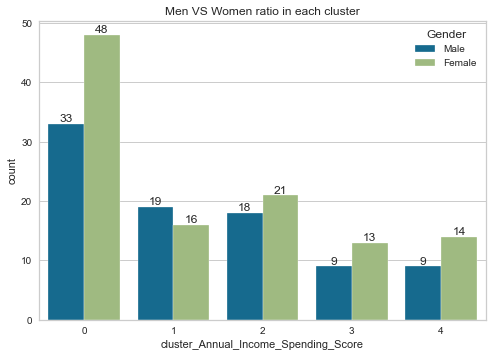

In [136]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [137]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income_k  \
Gender cluster_Annual_Income_Spending_Score                               
Female 0                                     40.895833        55.354167   
       1                                     43.250000        90.937500   
       2                                     32.190476        86.047619   
       3                                     25.461538        25.692308   
       4                                     43.214286        27.357143   
Male   0                                     45.363636        55.212121   
       1                                     39.315789        85.894737   
       2                                     33.277778        87.111111   
       3                                     25.000000        25.777778   
       4                                     48.333333        24.666667   

                                             Spending_Score_100  
Gender cluster_Annual_Income_Spending_Score                      
Female 0                                              49.000000  
       1                                              22.062500  
       2                                              81.666667  
       3                                              80.538462  
       4                                              21.714286  
Male   0                                              50.272727  
       1                                              12.947368  
       2                                              82.666667  
       3                                              77.666667  
       4                                              19.666667

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score_100'>

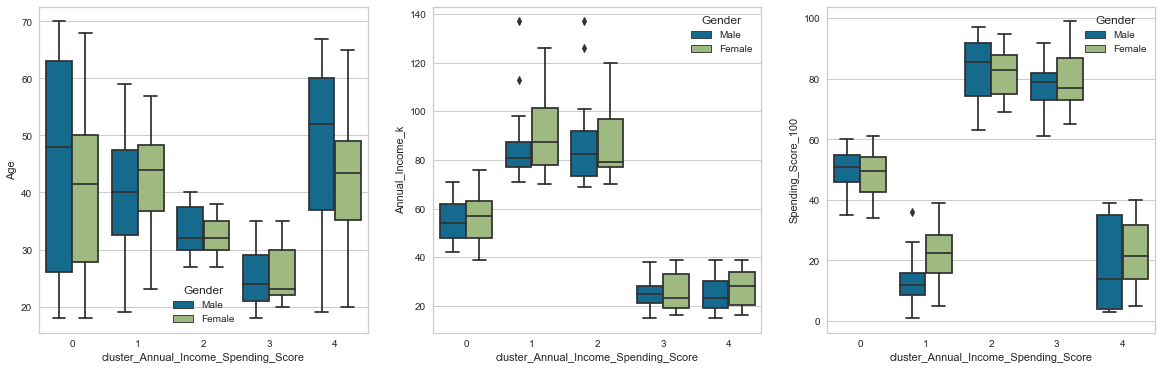

In [138]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income_k", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score_100", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score_100'>

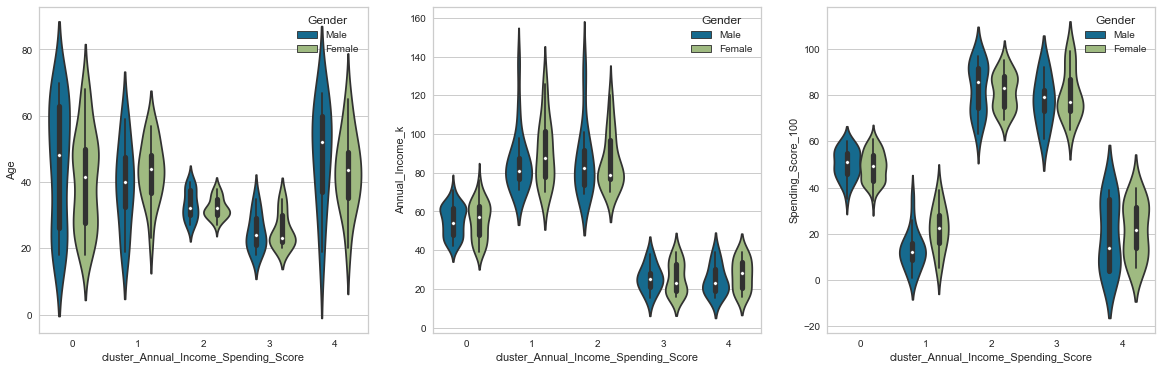

In [139]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income_k", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score_100", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

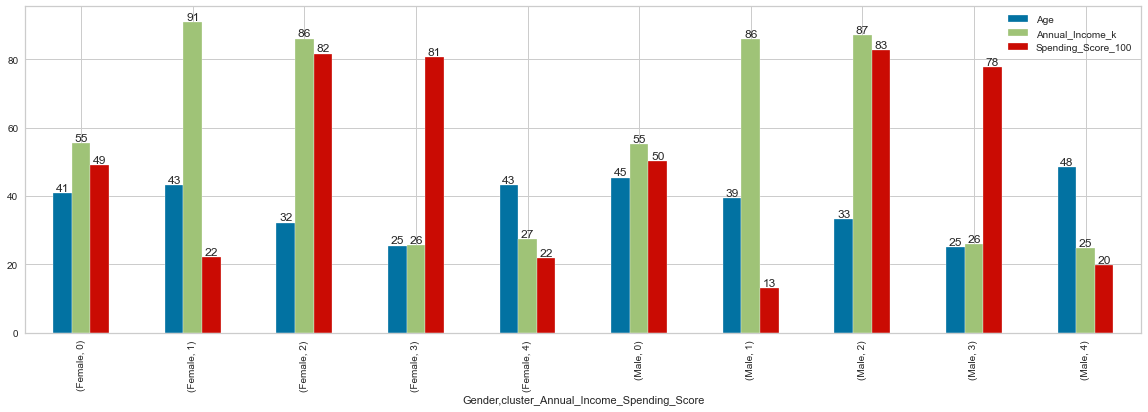

In [140]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annual income and spending scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, annual income is very high but the spending scores is low.
This group is our target audience and special strategies need to be developed for this group.  

**cluster 2**: The average age is around 32, the annual income and the spending scores
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual income but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 43. Both annual income and spending scores are low. It can be 
directed to shopping with gift certificates.

### Male

**cluster 0** : The average age is around 45, both annual income and spending scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annual income is very high but the spending scores is very low.
This group is our target audience and special strategies need to be developed for this group.  

**cluster 2**: The average age is around 33, the annual income and the spending score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual income but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 48. Both annual income and spending scores are low. It can be 
directed to shopping with gift certificates.


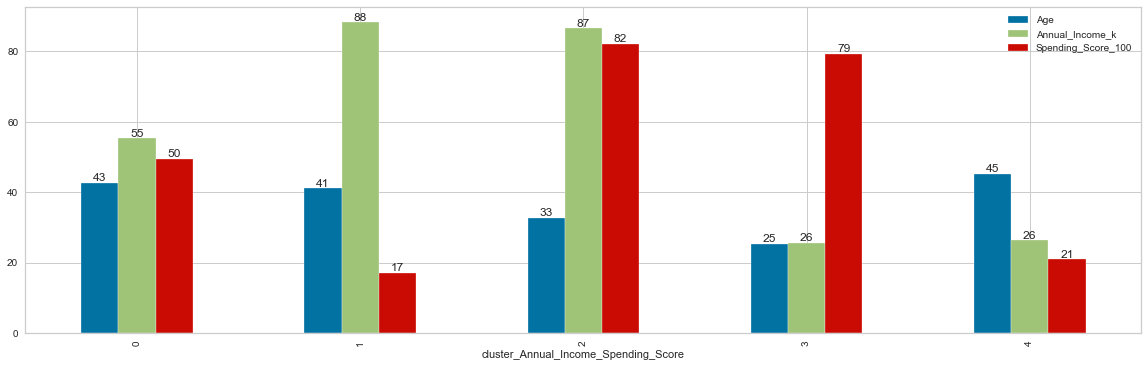

In [141]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annual income and spending scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annual income is very high but the spending scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2**: The average age is around 33, the annual income and the spending score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual income but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 45. Both annual income and spending scores are low. It can be 
directed to shopping with gift certificates.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___